In [35]:
# Import necessary libraries
import pandas as pd  # Library for data manipulation and analysis
import matplotlib.pyplot as plt  # Library for creating visualizations
import geopandas as gpd  # Library for working with geospatial data

In [36]:
# Load life expectancy data from Excel file into a DataFrame
life_expectancy_data = pd.read_excel("Life Expectancy by Year 1 (3).xlsx")

In [29]:
life_expectancy_data

,Gender,Country,1990,1991,1992,1993,1994,1995,1996,1997,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,men,Si#_7erra Leone,37.9,37.3,36.9,36.6,36.5,36.5,36.8,37.3,...,38.8,39.8,40.8,41.8,42.8,43.8,44.7,45.6,46.4,47.2
1,women,Lib#_7eria,45.1,45.4,45.9,46.7,47.7,48.9,49.9,50.7,...,51.6,NaN,51.8,NaN,52.5,53.3,54.2,55.3,56.3,57.3
2,men,N#_7epal,54.8,55.7,56.7,57.6,58.5,59.4,60.2,61.1,...,62.7,63.4,64.2,64.9,65.5,66.2,66.8,67.4,67.9,68.4
3,Female,K#_azakhstan7,NaN,61.4,NaN,NaN,59.4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,58.9,NaN,NaN,NaN,NaN,NaN
4,women,B#_7elarus,NaN,64.9,64.3,63.7,NaN,62.8,62.4,62.1,...,61.9,61.9,62.0,62.1,62.3,62.5,62.7,63.1,NaN,63.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,Female,Alb#_ania7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,71.9,NaN,NaN,NaN,NaN,NaN,NaN
465,men,D#_7enmark,77.7,77.8,77.9,78.0,78.1,78.2,78.3,78.5,...,78.9,79.1,79.3,79.5,79.7,79.9,80.2,80.4,80.7,80.9
466,men,Ic#_7eland,80.5,80.6,80.7,80.8,80.9,81.0,81.1,81.3,...,81.7,81.9,82.2,82.4,82.6,82.8,82.9,83.1,83.2,83.3
467,women,J#_apan7,75.9,76.1,76.2,76.3,76.5,76.6,76.8,77.0,...,77.5,77.7,77.9,78.1,NaN,78.5,78.7,78.9,NaN,79.3


In [37]:

# Create a copy of the original DataFrame for data preparation
life_expectancy_data_prepared = life_expectancy_data.copy()

# Replace occurrences of 'Female' in the 'Gender' column with 'women'
life_expectancy_data_prepared.replace({'Gender': 'Female'}, 'women', inplace=True)

# Remove any characters specified in the regex pattern '[#_7]' from the 'Country' column
life_expectancy_data_prepared.replace({'Country': '[#_7]'}, '', regex=True, inplace=True)

# Group the DataFrame by 'Gender' and 'Country', then calculate the mean life expectancy for each group
life_expectancy_data_prepared = life_expectancy_data_prepared.groupby(['Gender', 'Country']).mean()

# Convert column names to integers for consistency
life_expectancy_data_prepared.columns = life_expectancy_data_prepared.columns.astype(int)

# Interpolate missing values in the columns between 1990 and 2008 using linear interpolation,
# and fill missing values at the beginning of each row backward
life_expectancy_data_prepared.loc[:, 1990:2008] = \
    life_expectancy_data_prepared.loc[:, 1990:2008] \
        .interpolate(axis=1) \
        .bfill(axis=1)



In [39]:
life_expectancy_data_prepared

1990  1991  1992  1993  1994  1995  1996  1997  \
Gender Country                                                               
men    Afghanistan          50.9  51.7  52.4  53.1  53.6  54.2  54.7  55.2   
       Albania              75.0  75.0  75.0  75.0  75.2  75.4  75.6  75.9   
       Algeria              68.3  68.6  68.8  69.1  69.4  69.7  70.0  70.4   
       Angola               43.9  44.1  44.3  44.6  44.9  45.4  46.0  46.7   
       Antigua and Barbuda  73.8  74.0  74.3  74.5  74.7  74.9  75.1  75.3   
...                          ...   ...   ...   ...   ...   ...   ...   ...   
women  Uzbekistan           63.4  63.3  63.3  63.2  63.2  63.2  63.3  63.4   
       Vanuatu              61.8  62.2  62.7  63.1  63.5  64.0  64.4  64.8   
       Yemen                56.3  56.6  57.0  57.3  57.5  57.8  58.1  58.3   
       Zambia               42.7  42.2  41.8  41.4  41.2  41.2  41.2  41.5   
       Zimbabwe             55.0  53.7  52.4  50.9  49.5  48.1  46.8  45.6   

                            1998  1999  2000  2001  2002  2003  2004  2005  \
Gender Country                                                               
men    Afghanistan          55.6  56.1  56.7  57.2  57.8  58.5  59.1  59.7   
       Albania              76.3  76.6  77.0  77.3  77.5  77.8  78.0  78.2   
       Algeria              70.9  71.3  71.7  72.2  72.7  73.2  73.7  74.1   
       Angola               47.5  48.5  49.5  50.6  51.8  53.0  54.2  55.4   
       Antigua and Barbuda  75.5  75.7  75.9  76.1  76.3  76.5  76.7  76.9   
...                          ...   ...   ...   ...   ...   ...   ...   ...   
women  Uzbekistan           63.6  63.8  64.0  64.2  64.4  64.7  64.9  65.2   
       Vanuatu              65.1  65.5  65.9  66.2  66.6  66.9  67.2  67.5   
       Yemen                58.6  58.8  59.0  59.3  59.6  59.9  60.2  60.5   
       Zambia               41.9  42.4  43.0  43.8  44.7  45.7  46.8  48.0   
       Zimbabwe             44.5  43.6  43.0  42.7  42.6  42.8  43.3  44.1   

                            2006  2007  2008  
Gender Country                                
men    Afghanistan          60.3  60.9  61.5  
       Albania              78.3  78.5  78.7  
       Algeria              74.6  75.0  75.3  
       Angola               56.6  57.7  58.8  
       Antigua and Barbuda  77.1  77.3  77.5  
...                          ...   ...   ...  
women  Uzbekistan           65.6  65.9  66.3  
       Vanuatu              67.8  68.1  68.3  
       Yemen                60.9  61.2  61.6  
       Zambia               49.2  50.6  51.9  
       Zimbabwe             45.2  46.6  48.2  

[316 rows x 19 columns]

1. What is the female average life expectancy in Poland from 1990 to 2008?

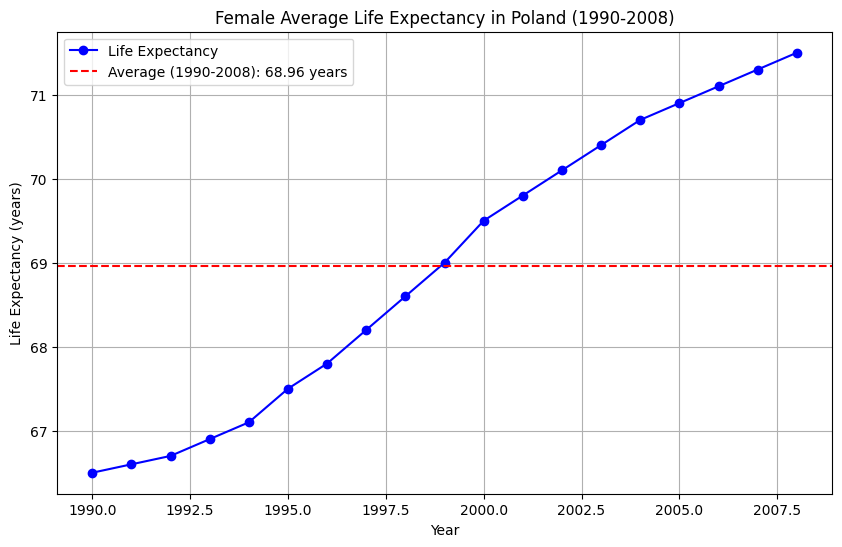

The female average life expectancy in Poland from 1990 to 2008 is: 68.96 years


In [32]:
# Selecting data for females in Poland from 1990 to 2008
# Selecting the life expectancy data for women in Poland from the prepared dataset for the years 1990 to 2008
female_life_expectancy_poland = life_expectancy_data_prepared.loc[('women', 'Poland'), 1990:2008]

# Calculating the average value for this period
# Calculating the average life expectancy for females in Poland from 1990 to 2008
average_life_expectancy = female_life_expectancy_poland.mean()

# Plotting the data
# Setting up the plot to visualize the data
plt.figure(figsize=(10, 6))
# Plotting the life expectancy for each year with markers and lines
plt.plot(female_life_expectancy_poland.index, female_life_expectancy_poland.values, marker='o', linestyle='-', color='b', label='Life Expectancy')
# Adding a horizontal dashed line representing the average life expectancy over the specified period
plt.axhline(y=average_life_expectancy, color='r', linestyle='--', label=f'Average (1990-2008): {average_life_expectancy:.2f} years')

# Plot settings
# Setting the title, axis labels, and legend for the plot
plt.title('Female Average Life Expectancy in Poland (1990-2008)')
plt.xlabel('Year')
plt.ylabel('Life Expectancy (years)')
plt.legend()
# Enabling gridlines on the plot
plt.grid(True)

# Displaying the plot
# Showing the plot
plt.show()

# Printing the result using your code line
# Printing out the average life expectancy in a human-readable format
print(f"The female average life expectancy in Poland from 1990 to 2008 is: {average_life_expectancy:.2f} years")


2. Which country has observed the highest YOY average life expectancy? Please indicate in which year it
happened and what was the % growth.

('Rwanda', 1996)
+12.343750000000009%


C:\Users\Blayence\AppData\Local\Temp\ipykernel_18396\2479844248.py:33: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


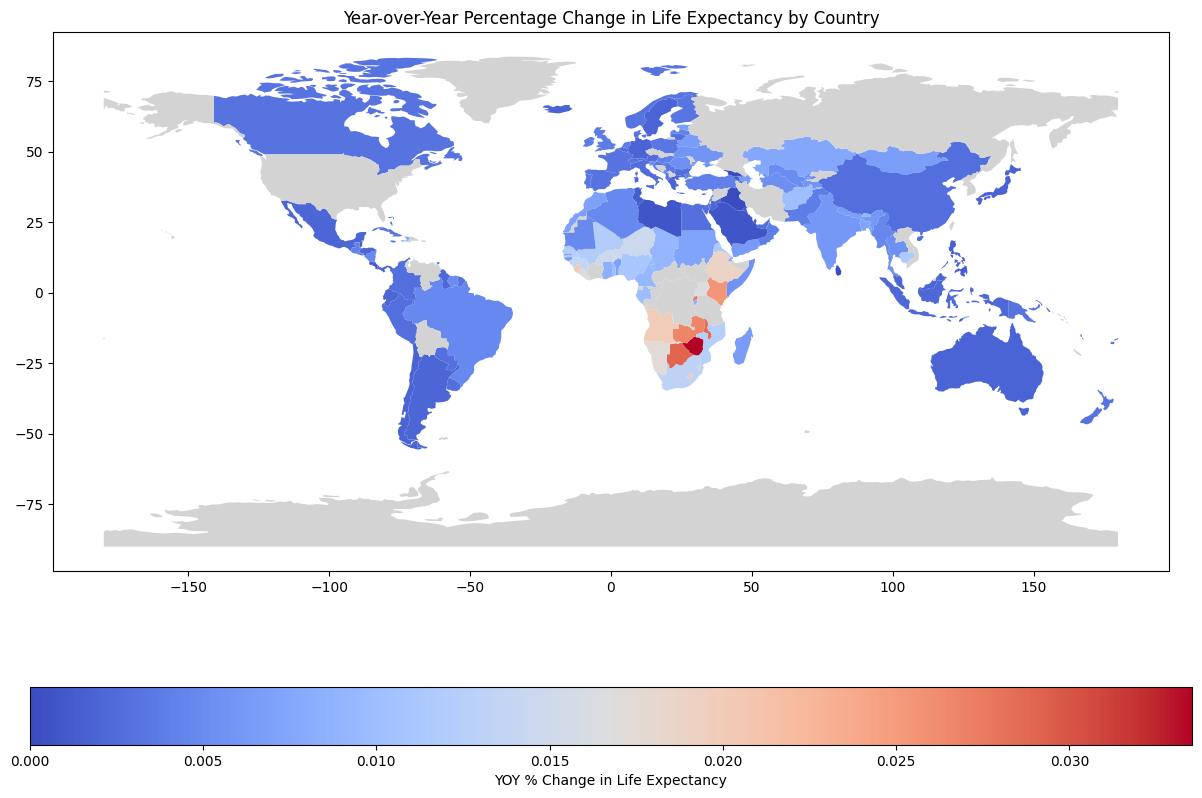

In [33]:
# Calculating Percentage Changes

# Reshape the data frame into long format, with 'Year' as the index
# Calculate the percentage change in life expectancy for each country across years
# Drop missing values
percent_changes = \
    pd.melt(life_expectancy_data_prepared, var_name='Year', value_name='lifeexp', ignore_index=False) \
    .set_index('Year', append=True)['lifeexp'] \
    .groupby(level=['Country', 'Year']) \
    .sum() \
    .groupby(level='Country') \
    .pct_change() \
    .dropna()

# Find the index (country and year) where the maximum percentage change occurred
# Find the maximum percentage change
max_country = percent_changes.idxmax()
max_percentage_change = percent_changes.max()

# Print the result
print(max_country)
print(f'{max_percentage_change * 100:+}%')

# Preparing Data for Visualization

# Find the latest year in the data
latest_year = percent_changes_df['Year'].max()

# Select data for the latest year
latest_data = percent_changes_df[percent_changes_df['Year'] == latest_year]

# Load geospatial data representing the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Rename the column containing country names to match the country names in the life expectancy data
world = world.rename(columns={'name': 'Country'})

# Merge the latest data with the geospatial data based on country names
world_data = world.merge(latest_data, on='Country', how='left')

# Visualizing Data on a Map

# Create a matplotlib figure and axis for the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot the data on the map, with colors representing the YOY percentage change in life expectancy
world_data.plot(column='lifeexp', ax=ax, legend=True,
                legend_kwds={'label': "YOY % Change in Life Expectancy",
                             'orientation': "horizontal"},
                cmap='coolwarm', missing_kwds={'color': 'lightgrey'})

# Set the title of the map
ax.set_title('Year-over-Year Percentage Change in Life Expectancy by Country')

# Display the map
plt.show()

In [40]:
# Export the prepared DataFrame to an Excel file named 'life_expectancy_data_prepared.xlsx'
life_expectancy_data_prepared.to_excel('life_expectancy_data_prepared.xlsx')